# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [2]:
X,y,c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [3]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],    ## Dimension 1
        'x2': X[:,1],   ## Dimension 2
        'y' : y          ## Cluster al que pertenece
    }
)

In [4]:
## Para ver los centroides
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

## Visualización de datos

<AxesSubplot:xlabel='x1', ylabel='x2'>

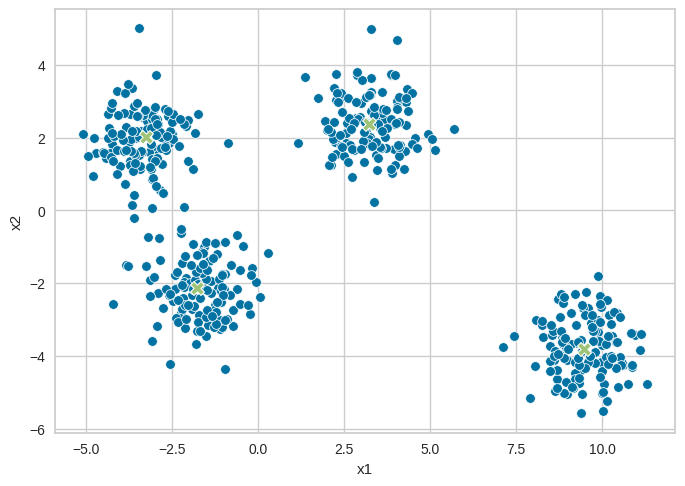

In [5]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
 # Se grafican los datos y su centroide Real.
 

## Aplicando K-means

In [6]:
kmeans = KMeans(n_clusters=3)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_

df_k_means_center= pd.DataFrame(
    {
        'x1' : k_means_centers[:,0],
        'x2' : k_means_centers[:,1]
    }
)

In [7]:
df_blobs

,x1,x2,y,cluster
0,9.977787,-4.153752,0,0
1,-2.769773,-2.678787,3,1
2,-4.708023,1.577234,1,1
3,-0.890700,1.843799,1,1
4,-2.681549,2.059343,1,1
...,...,...,...,...
495,2.434074,1.743985,2,2
496,-1.199443,-2.525364,3,1
497,2.389152,2.076048,2,2
498,8.499677,-3.137478,0,0


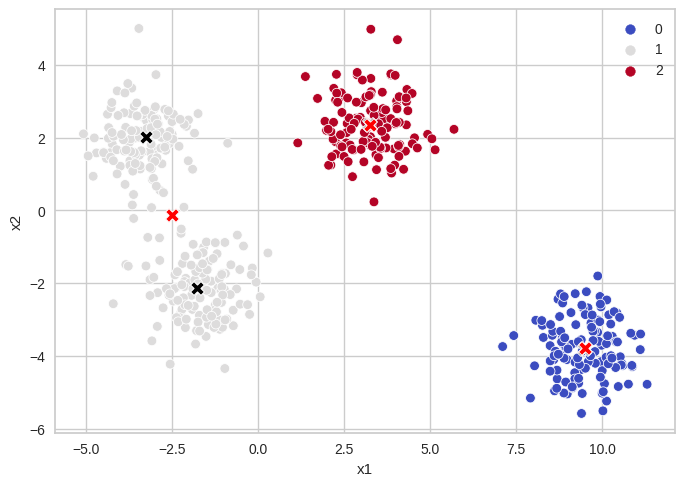

In [11]:
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100, color='black')
sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='X', s=100, color='red')

plt.show()

Notemos que los centroides originales alineados con los ajustados con kmeans, notemos que si cambiamos los k's, los centroides se ajustan a la cantidad de clusters que le indiquemos. en esta imagen se ve cómo la escogencia del numero de clusters se ve de inmediato en la gráfica.

#### **Aporte de un estudiante**

Detallen bien su escogencia del número de clusters cuando evalúen el rendimiento del modelo con el silhouette score. Aquí por ejemplo generé los datos con cuatro centroides como en la clase, e hice el entrenamiento del modelo con tres clusters y obtuve lo siguiente:

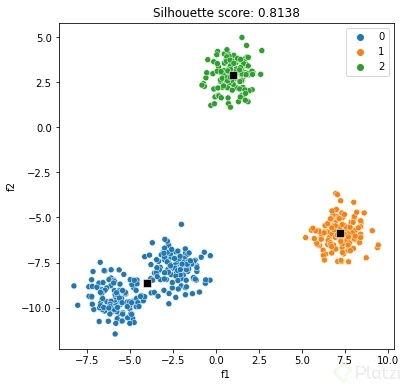

También realicé el entrenamiento con cuatro clusters y obtuve lo siguiente:

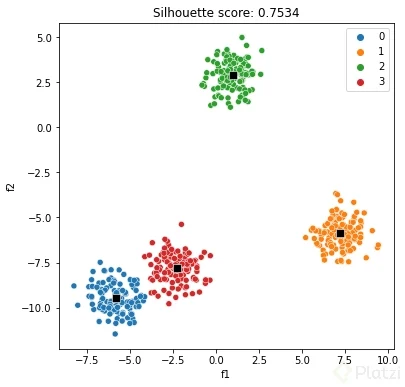

Observen que el silhouette score fue mejor (más cercano a 1) con tres clusters, pero de entrada sabemos que en realidad en los datos hay cuatro clusters diferentes, así que sí, no se confíen solo en la primera métrica que saquen, hay que detallar más los resultados :)

## Encontrando el valor de K

1. Método del codo: distancia de cada punto al centroide en que se encuentra y esto se eleva al cuadrado,  y se saca el promedio de todos los puntos, y se hace para cada k, y se grafica, y se busca el punto donde la gráfica se asemeje a un codo, y ese es el valor de k.

Encontrar el punto en que con menos cluster tenga una disminución que pueda satisfacer la necesidad

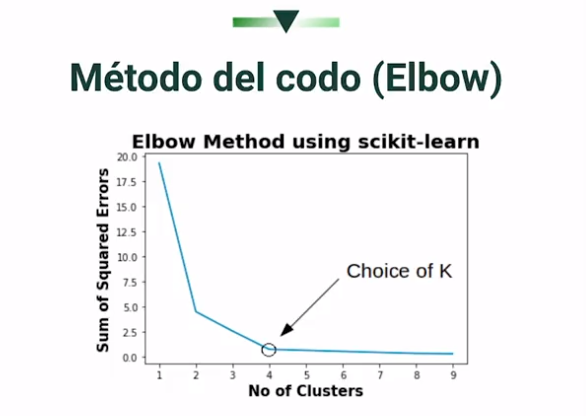
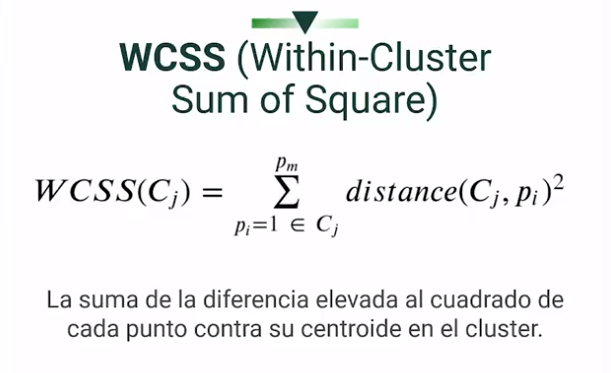
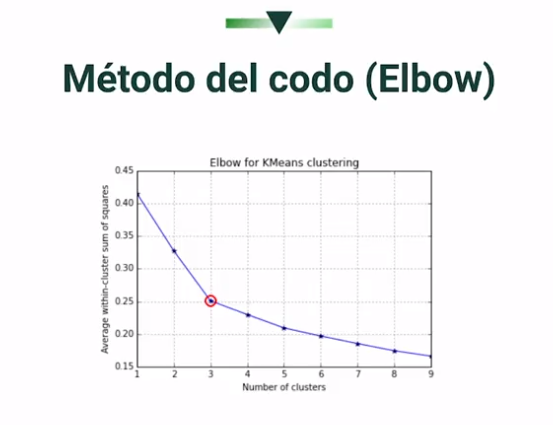


2. Método de la silueta: se calcula el silhouette score para cada k, y se busca el valor de k que tenga el silhouette score más alto.

In [12]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_

    df_k_means_center= pd.DataFrame(
        {
            'x1' : k_means_centers[:,0],
            'x2' : k_means_centers[:,1]
        }
    )
    sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100, color='black')
    sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='X', s=100, color='red')

    plt.show()

In [13]:
for i in range(3,7):
    print(_)
    vis_cluster(_)

AxesSubplot(0.125,0.11;0.775x0.77)


InvalidParameterError: The 'n_clusters' parameter of KMeans must be an int in the range [1, inf). Got <AxesSubplot:xlabel='x1', ylabel='x2'> instead.

## Evaluando clusters con K-means